In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, NMF
from sklearn.model_selection import train_test_split as tts

import tensorflow as tf

In [2]:
data = pd.read_csv('data/en_cards.csv')

In [3]:
data.head(3)

,name,released_at,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,set,rarity,flavor_text
0,Fury Sliver,2006-10-06,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,3,3,['R'],['R'],[],tsp,uncommon,"""A rift opened, and our arrows were abruptly s..."
1,Kor Outfitter,2009-10-02,{W}{W},2.0,Creature — Kor Soldier,"When Kor Outfitter enters the battlefield, you...",2,2,['W'],['W'],[],zen,common,"""We take only what we need to survive. Believe..."
2,Spirit,2015-05-22,NaN,0.0,Token Creature — Spirit,Flying,1,1,['W'],['W'],['Flying'],tmm2,common,NaN


In [4]:
working = data.copy()

In [5]:
unsets = ['ugl', 'und', 'ust', 'unh']
indices = []

In [6]:
for abb in unsets:
    indices.append(data[data['set'] == abb].index)

In [7]:
for unset in indices:
    working.drop(index = unset, inplace = True)

In [8]:
working.pop('released_at')

0        2006-10-06
1        2009-10-02
2        2015-05-22
3        2017-09-29
4        1994-04-01
            ...    
56195    2020-08-13
56196    2015-07-17
56197    2009-09-04
56198    2003-07-28
56199    2018-01-19
Name: released_at, Length: 55580, dtype: object

In [9]:
labels = working.pop('cmc')

In [10]:
working.reset_index(drop = True, inplace = True)

In [11]:
no_nas = working.fillna('').astype(str)

In [12]:
X_train, X_test, y_train, y_test = tts(no_nas, labels)
X_train, X_val, y_train, y_val = tts(X_train, y_train)

In [13]:
pd.isna(no_nas).any()

name              False
mana_cost         False
type_line         False
oracle_text       False
power             False
toughness         False
colors            False
color_identity    False
keywords          False
set               False
rarity            False
flavor_text       False
dtype: bool

In [14]:
X_train.iloc[0].values.tolist()

['Mountain',
 '',
 'Basic Land — Mountain',
 '({T}: Add {R}.)',
 '',
 '',
 '[]',
 "['R']",
 '[]',
 's99',
 'common',
 '']

In [15]:
train_corpus = []
for doc in X_train.values.tolist():
    doc_list = []
    for term in doc:
        doc_list.append(term)
    train_corpus.append(str(doc_list))

In [16]:
test_corpus = []
for row in X_test.values:
    test_corpus.append(str(row.astype(str)))

In [17]:
val_corpus = []
for row in X_val.values:
    val_corpus.append(str(row.astype(str)))

In [18]:
type(train_corpus[0]), train_corpus[0]

(str,
 '[\'Mountain\', \'\', \'Basic Land — Mountain\', \'({T}: Add {R}.)\', \'\', \'\', \'[]\', "[\'R\']", \'[]\', \'s99\', \'common\', \'\']')

In [19]:
tf_idfv = TfidfVectorizer(
    strip_accents=None,
    analyzer='word',
    stop_words='english',
    max_df=1.0,
    min_df=1,
    max_features=500,
    norm='l2')

In [20]:
count_mat_vec = tf_idfv.fit(train_corpus)

In [21]:
#count_mat_vec.vocabulary_

In [22]:
vocab = count_mat_vec.vocabulary_

In [23]:
feat_names = count_mat_vec.get_feature_names()

In [24]:
train_sparse = count_mat_vec.transform(train_corpus)

In [25]:
dense = train_sparse.toarray()

In [26]:
#dense.nonzero()

In [27]:
val_sparse = count_mat_vec.transform(val_corpus)

In [28]:
nmf = NMF(
    n_components=125,
    max_iter=200,
    alpha=0.1,
    l1_ratio=0.0,
    verbose=1,
    shuffle=False
)

In [29]:
nmf.fit(train_sparse)

violation: 1.0
violation: 0.21282867701953206
violation: 0.20103676199973802
violation: 0.1309400420734941
violation: 0.09123631057818157
violation: 0.06342514403655651
violation: 0.04751597025338314
violation: 0.038494809468179535
violation: 0.030679535248266367
violation: 0.023961401092129624
violation: 0.018835504751306142
violation: 0.015634830780157535
violation: 0.013603100380768953
violation: 0.01220073800727811
violation: 0.011083633221682949
violation: 0.010205779744906919
violation: 0.00940280193950088
violation: 0.008811873656695723
violation: 0.008374794606774665
violation: 0.007982773982699932
violation: 0.0075315979820304736
violation: 0.006948749773552358
violation: 0.006303061845488572
violation: 0.005694402237473165
violation: 0.005209996031693163
violation: 0.004819346201161438
violation: 0.004497818955194135
violation: 0.004219972613564657
violation: 0.003972862050414759
violation: 0.003739206295422438
violation: 0.0035345183728233754
violation: 0.003356198895172969


NMF(alpha=0.1, n_components=125, verbose=1)

In [30]:
W = nmf.transform(train_sparse)
H = nmf.components_

violation: 1.0
violation: 0.16308920372380756
violation: 0.009507800307306864
violation: 0.0012912144872395048
violation: 0.00021290156494600842
violation: 3.706516815180247e-05
Converged at iteration 7


In [31]:
W[0]

array([0.        , 0.05559498, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00220188,
       0.00224126, 0.        , 0.00226828, 0.22619614, 0.00225437,
       0.        , 0.        , 0.04032596, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05273712,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(20, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_[:10]):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.tight_layout()
    plt.show()
    plt.savefig('images/LatentFeatures.png')

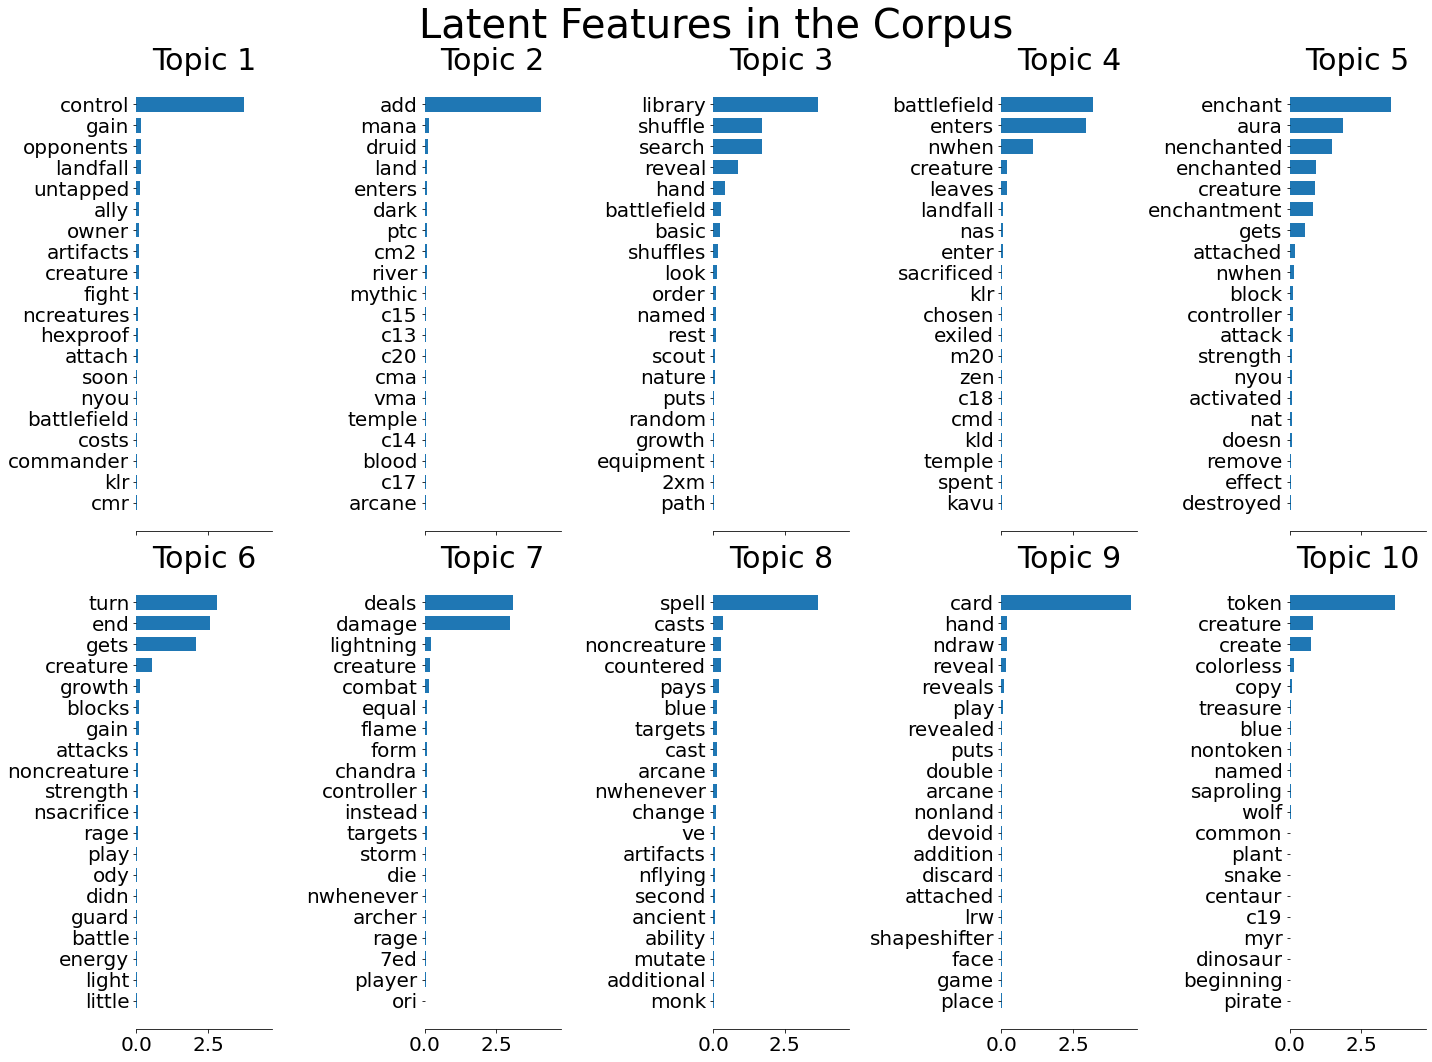

<Figure size 432x288 with 0 Axes>

In [33]:
plot_top_words(nmf, feat_names, 20, 'Latent Features in the Corpus')